In [2]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### 1.Load the dataset and explore the variables.

In [18]:
data=pd.read_csv('customer_churn.csv')
churn = data.copy()
display(churn.head())
churn['Churn'].value_counts(dropna=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64

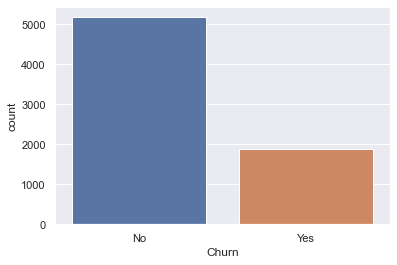

In [6]:
sns.set()
sns.countplot(x='Churn', data=churn);
plt.show()

In [ ]:
# we have quite a large data imbalance..

In [9]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [10]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#variables tenure, SeniorCitizen,MonthlyCharges are of the types int,int na dfloat respectivly (numericals)

In [13]:
indpendent_df = churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
indpendent_df.head(10)

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
5,8,0,99.65
6,22,0,89.10
7,10,0,29.75
8,28,0,104.80
9,62,0,56.15


In [14]:
# we have some zeros in the Senior citizen coloumn, lets see if it is actually unique
indpendent_df['SeniorCitizen'].unique()
#yes, they are no probem to consider them during our models..

array([0, 1], dtype=int64)

In [ ]:
# NOTE to SELF: input the subplots of raw evaluated data and cross check with answer 5

#### 3.Extract the target variable.

In [ ]:
# our target variable is the Churn that we wanted to predict from the rest of the labels

In [24]:
y = churn['Churn'] #the dependent variable
y.unique()

array(['No', 'Yes'], dtype=object)

#### 4. Extract the independent variables and scale them

In [ ]:
#extraxting them and finding out the correlation 

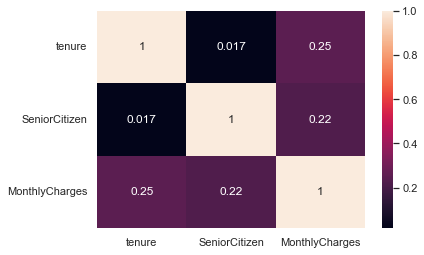

In [23]:
sns.set()
sns.heatmap(churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']].corr(), annot=True)
plt.show()

In [27]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#due to less samples i split them randomly with test size of 30%

In [36]:
transformer = StandardScaler() 
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_test_scaled.head(10)

,tenure,SeniorCitizen,MonthlyCharges
2200,-0.547017,-0.435843,-0.223356
4627,1.126540,-0.435843,1.728455
3225,-0.791928,-0.435843,0.236188
2828,-1.281750,-0.435843,-1.485015
3768,0.922448,-0.435843,0.430032
4446,-1.200113,2.294405,0.501888
2234,-0.383743,-0.435843,-0.173224
5454,-1.281750,2.294405,0.155977
1278,0.146897,-0.435843,-0.139803
578,0.106078,2.294405,0.991512


In [37]:
y_train.head(5)

3580    Yes
2364     No
6813    Yes
789      No
561      No
Name: Churn, dtype: object

#### 5. Build the logistic regression model.

In [38]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [39]:
lr.predict_proba(X_train_scaled)

array([[0.50089224, 0.49910776],
       [0.49554275, 0.50445725],
       [0.97945825, 0.02054175],
       ...,
       [0.98747028, 0.01252972],
       [0.26352181, 0.73647819],
       [0.79390382, 0.20609618]])

In [40]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [41]:
lr.predict_proba(X_train_scaled).shape

(4930, 2)

In [42]:
lr.predict(X_train_scaled)

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [43]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

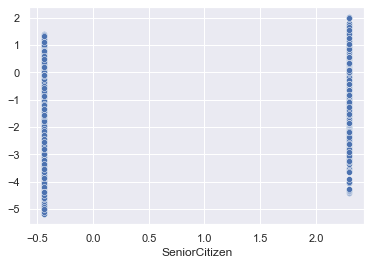

In [44]:
sns.set()
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

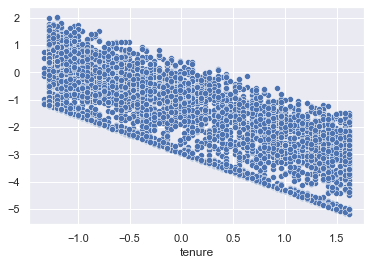

In [46]:
sns.set()
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

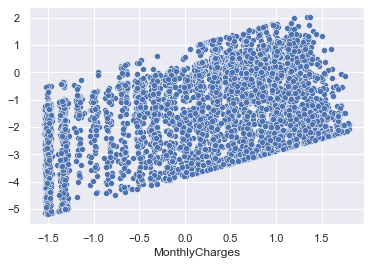

In [48]:
sns.set()
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

#### 6. Evaluate the model.

In [70]:
# figuring out the metrics for the result we got above
y_pred_test = lr.predict(X_test_scaled) 
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.63
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.53
The Kappa in the TEST set is: 0.40


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

##### Though the accuracy is high, the Kappa score is low we need to predict the true positives and negatives 

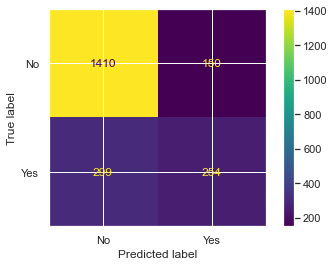

In [53]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
sns.set()
disp.plot()
plt.show()
#my model is very good at predicting true negative (Yellow)

#### 7.Even a simple model will give us more than 70% accuracy. Why?

#### Due to the class imbalance. lets look at the Target Distribution, to understand this scenerio More..

<AxesSubplot:title={'center':'training set'}>

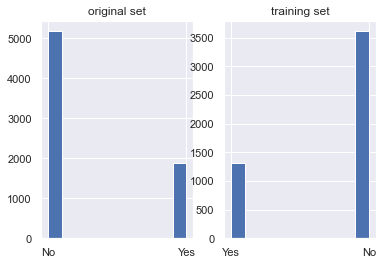

In [71]:
sns.set()
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title("original set")
y.hist()
plt.subplot(1, 2, 2) # index 2
plt.title("training set")
y_train.hist()

#### Another strategy is to re sample the test and train data sets with different ratios. But since we have SMOTE solution we will go with that here

#### 8.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

#### Let's Fit the SMOTE

In [89]:
sm = SMOTE(random_state=100,k_neighbors=3) #KNN = 3 instances
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

print(X_train.shape)
print(X_train_SMOTE.shape)

y_train_SMOTE.value_counts()

(4930, 3)
(7228, 3)


Yes    3614
No     3614
Name: Churn, dtype: int64

In [90]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(random_state=0)

In [91]:
lr.predict(X_train_SMOTE)

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [92]:
lr.predict_proba(X_train_scaled)

array([[0.26782225, 0.73217775],
       [0.25966332, 0.74033668],
       [0.94787051, 0.05212949],
       ...,
       [0.96951028, 0.03048972],
       [0.11576683, 0.88423317],
       [0.61013449, 0.38986551]])

#### Checking the accuracy with this method

In [93]:
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


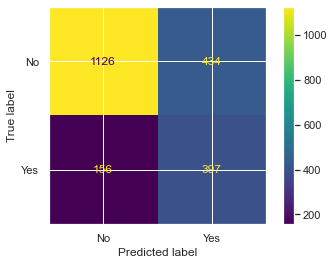

In [94]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

#### not much improvement, with No value predictions

#### Resources: 
1. https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

2. https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7